# Lab 02: CNOT Gate and Bell State (Solution)

This notebook contains the solutions for the CNOT Gate and Bell State lab exercises. You can use this as a reference to check your work or to understand the expected implementations for each task.

## Learning Objectives
After completing this lab, you should be able to:
1. Understand and implement the CNOT gate
2. Create and measure Bell states
3. Verify quantum entanglement through measurement results
4. Extend Bell states to more complex quantum circuits
5. Understand the significance of entanglement in quantum computing

## Exercise 1: Setup and Environment Preparation

First, let's import the necessary libraries and set up our quantum environment.

In [1]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

## Exercise 2: Understanding the CNOT Gate

The Controlled-NOT (CNOT) gate is a two-qubit gate with one control qubit and one target qubit. It applies an X gate (NOT operation) on the target qubit only if the control qubit is in the state |1⟩.

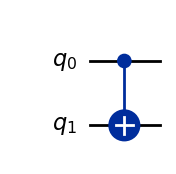

In [2]:
# Create a quantum circuit with 2 qubits
qc = QuantumCircuit(2)

# Apply the CNOT gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Visualize the circuit
qc.draw('mpl')

### Understanding the CNOT Circuit

In the circuit above, nothing interesting happens yet because both qubits start in the state |0⟩. The CNOT gate only flips the target qubit if the control qubit is |1⟩.

## Exercise 3: CNOT with Initial States

Let's explore how the CNOT gate behaves with different initial states of the control qubit.

Measurement results: {'11': 1000}


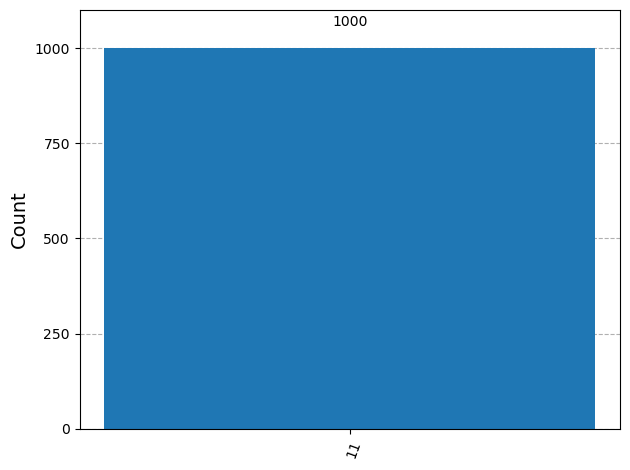

In [3]:
# Create a quantum circuit with 2 qubits and 2 classical bits for measurement
qc = QuantumCircuit(2, 2)

# Apply X gate to the control qubit (qubit 0) to set it to |1⟩
qc.x(0)

# Apply the CNOT gate
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Visualize the circuit
qc.draw('mpl')

# Run the circuit on a simulator and get the results
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(qc)

# Print the results and plot the histogram
print("Measurement results:", counts)
plot_histogram(counts)

### Analysis

In this circuit, we expect to see measurement results of |11⟩ because:
1. We set the control qubit (qubit 0) to |1⟩ using the X gate
2. The CNOT gate flips the target qubit (qubit 1) because the control qubit is |1⟩
3. This results in both qubits being in state |1⟩

## Exercise 4: Creating a Bell State

A Bell state is a maximally entangled quantum state of two qubits. The most common Bell state (Φ+) can be created by applying a Hadamard gate to the first qubit followed by a CNOT gate.

Bell state measurement results: {'00': 486, '11': 514}


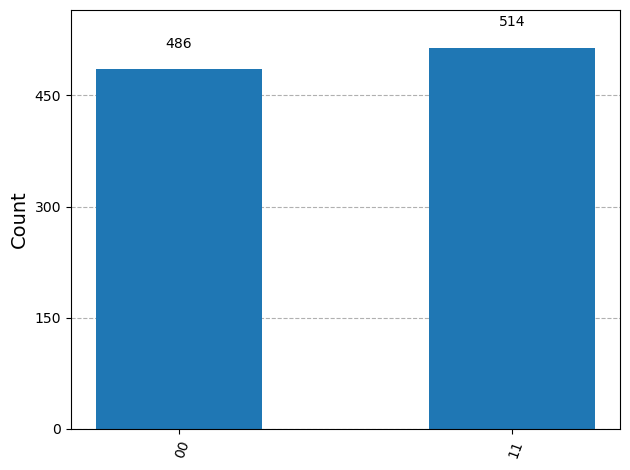

In [4]:
# Create a quantum circuit with 2 qubits and 2 classical bits
bell_circuit = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
bell_circuit.h(0)

# Apply a CNOT gate with qubit 0 as control and qubit 1 as target
bell_circuit.cx(0, 1)

# Add measurements for both qubits
bell_circuit.measure([0, 1], [0, 1])

# Visualize the circuit
bell_circuit.draw('mpl')

# Run the circuit on the simulator and get the results (1000 shots)
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(bell_circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(bell_circuit)

# Print the results and plot the histogram
print("Bell state measurement results:", counts)
plot_histogram(counts)

### Understanding Bell States

The Bell state we've created is represented mathematically as:

$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

This means the two qubits are in a superposition of being both 0 and both 1, with equal probability. When we measure this state, we should only get results |00⟩ or |11⟩, each with approximately 50% probability.

This perfect correlation between the qubits, regardless of which result we get, is a signature of quantum entanglement.

## Exercise 5: Creating Different Bell States

There are four maximally entangled Bell states. Let's create the $|\Psi^+\rangle$ Bell state, which should result in measurements of either |01⟩ or |10⟩.

Ψ+ Bell state measurement results: {'01': 497, '10': 503}


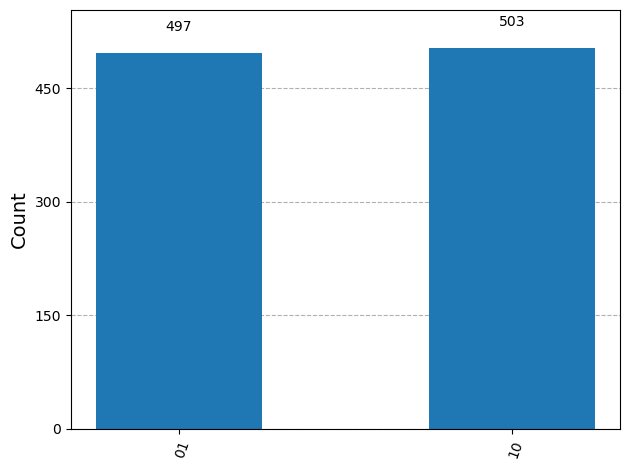

In [5]:
# Create a quantum circuit for the Ψ+ Bell state
psi_plus = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
psi_plus.h(0)

# Apply a CNOT gate
psi_plus.cx(0, 1)

# Apply an X gate to the second qubit to transform Φ+ into Ψ+
psi_plus.x(1)

# Add measurements
psi_plus.measure([0, 1], [0, 1])

# Visualize the circuit
psi_plus.draw('mpl')

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(psi_plus, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(psi_plus)

# Display the results
print("Ψ+ Bell state measurement results:", counts)
plot_histogram(counts)

### Understanding the Results

In the $|\Psi^+\rangle$ Bell state, the measurement results should show approximately equal probabilities for states |01⟩ and |10⟩, with little or no occurrences of |00⟩ or |11⟩.

## Exercise 6: Bell State Transformation

Starting with the $|\Phi^+\rangle$ Bell state, we'll apply an X gate to the second qubit before measurement.

Transformed Bell state measurement results: {'10': 507, '01': 493}


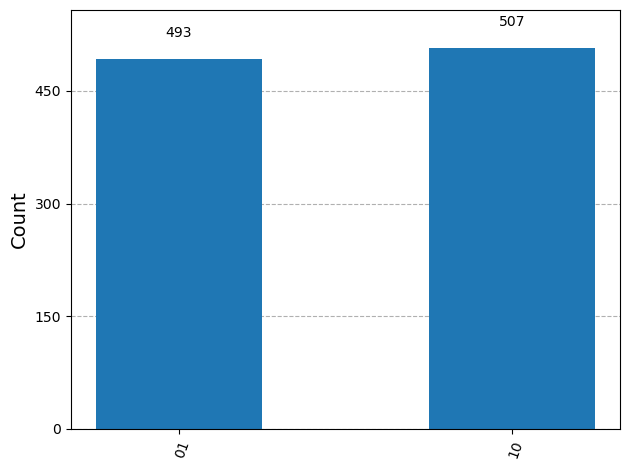

In [6]:
# Create the Φ+ Bell state as in Exercise 4
bell_x_circuit = QuantumCircuit(2, 2)
bell_x_circuit.h(0)
bell_x_circuit.cx(0, 1)

# Apply an X gate to the second qubit
bell_x_circuit.x(1)

# Add measurements, visualize, and run the circuit
bell_x_circuit.measure([0, 1], [0, 1])
bell_x_circuit.draw('mpl')

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(bell_x_circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(bell_x_circuit)

# Display the results
print("Transformed Bell state measurement results:", counts)
plot_histogram(counts)

**Question**: What Bell state did you create by applying the X gate to the second qubit of the $|\Phi^+\rangle$ state?

**Answer**: By applying an X gate to the second qubit of the $|\Phi^+\rangle$ state, we transformed it into the $|\Psi^+\rangle$ state. 

The original $|\Phi^+\rangle$ state is $\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$. When we apply the X gate to the second qubit, it transforms $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$, resulting in:

$\frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

This is exactly the definition of the $|\Psi^+\rangle$ Bell state. The measurement results confirm this transformation as we now see only |01⟩ and |10⟩ outcomes, instead of |00⟩ and |11⟩.

## Challenge Exercise: GHZ State

The Greenberger-Horne-Zeilinger (GHZ) state is a multi-qubit entangled state that extends the concept of Bell states to three or more qubits.

GHZ state measurement results: {'000': 486, '111': 514}


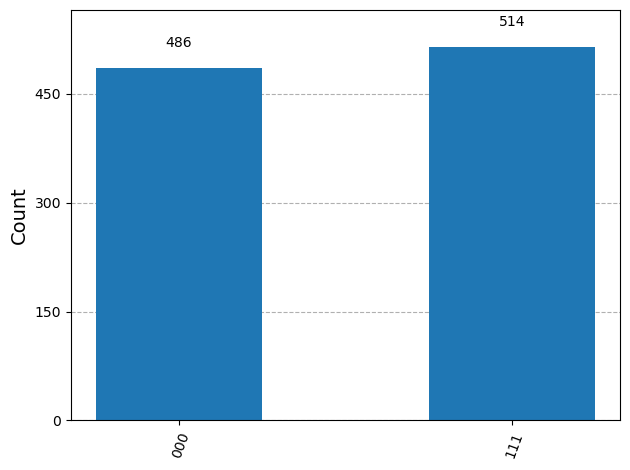

In [7]:
# Create a quantum circuit with 3 qubits and 3 classical bits
ghz_circuit = QuantumCircuit(3, 3)

# Apply gates to create the GHZ state
ghz_circuit.h(0)  # Hadamard on first qubit
ghz_circuit.cx(0, 1)  # CNOT with control qubit 0 and target qubit 1
ghz_circuit.cx(0, 2)  # CNOT with control qubit 0 and target qubit 2

# Add measurements
ghz_circuit.measure([0, 1, 2], [0, 1, 2])

# Visualize the circuit
ghz_circuit.draw('mpl')

# Run the circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(ghz_circuit, simulator)
job = simulator.run(compiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts(ghz_circuit)

# Display the results
print("GHZ state measurement results:", counts)
plot_histogram(counts)

### Understanding the GHZ State

The GHZ state we've created is represented mathematically as:

$$|GHZ\rangle = \frac{1}{\sqrt{2}}(|000\rangle + |111\rangle)$$

This state demonstrates entanglement among three qubits. When measured, we only observe the states |000⟩ and |111⟩, each with approximately 50% probability. This indicates that all three qubits are perfectly correlated.

## Reflection Questions

1. Why is the CNOT gate important in quantum computing?
   - **Answer**: The CNOT gate is one of the fundamental two-qubit gates that enables interaction between qubits. It's essential for creating entanglement and is a universal gate that, when combined with single-qubit gates, can implement any quantum operation. The CNOT gate is used in many quantum algorithms and is a key building block for quantum error correction codes.

2. How would you explain quantum entanglement to someone who is not familiar with quantum mechanics?
   - **Answer**: Quantum entanglement is a phenomenon where two or more particles become connected in such a way that the quantum state of each particle cannot be described independently of the others, regardless of the distance separating them. You can think of it as a special connection between particles, where measuring one particle instantly determines the state of its entangled partner. It's like having two coins that always show the same face when flipped, even if they're on opposite sides of the universe.

3. What happens to the Bell state if you measure only one of the qubits?
   - **Answer**: If you measure one qubit of a Bell state, the other qubit's state is immediately determined, even without directly measuring it. For example, in the $|\Phi^+\rangle$ state (|00⟩ + |11⟩)/√2, if you measure the first qubit and get 0, the second qubit will also be 0. If you measure the first qubit and get 1, the second qubit will also be 1. This is the essence of quantum entanglement - measuring one part affects the whole system instantaneously.

4. How does the number of possible entangled states increase with the number of qubits?
   - **Answer**: The number of possible entangled states increases exponentially with the number of qubits. For n qubits, there are 2^n possible basis states, and the potential entangled states are superpositions of these basis states. This exponential scaling is why quantum computers are potentially powerful - they can represent and process vast amounts of information with relatively few qubits when the qubits are entangled.

5. What applications do Bell states have in quantum computing and quantum information?
   - **Answer**: Bell states are foundational for many quantum protocols and applications, including:
     - Quantum teleportation: Transferring quantum information between locations
     - Superdense coding: Encoding two classical bits in a single qubit
     - Quantum key distribution (QKD): Creating secure cryptographic keys
     - Bell's inequality tests: Experimental verification of quantum mechanics
     - Quantum error correction: Protecting quantum information from noise
     - Quantum computing algorithms: Many algorithms utilize entanglement for speedup

## Summary

In this lab, we have:
- Implemented and understood the CNOT gate
- Created and measured Bell states
- Observed quantum entanglement
- Extended our understanding to more complex entangled states (GHZ state)

These concepts are fundamental to quantum computing and form the basis for many quantum algorithms and protocols, including quantum teleportation, superdense coding, and quantum error correction.